## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.<br>

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. <br>

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits. <br>

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know: <br>

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands <br>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. <br>

## Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##### Importing the libraries

In [1]:
#import the warnings 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Data Cleaning :

##### Read the dataset 

In [3]:
df = pd.read_csv(r'C:\Users\Srilathaa Vasu\Jupyter Notebooks\IIIT-B\Assignments\Bike sharing LR Assignment\Dataset\day.csv')

In [4]:
#Print the head of the data frame.
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Checking for null values in the dataset

In [8]:
#Count the missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the dataset. <br>

##### Fixing the rows and columns

In [9]:
list(df.columns)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [10]:
# renaming few columns for better understanding
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

* Removing all the unnecessary columns from the dataset.
* 'instant' column contains only index values.
* We have separate columns like month and weekday. So 'dteday' column is not necessary.
* casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [11]:
#Removing all the unneccesary columns from the dataset
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [12]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


* season, yr, mnth, holiday, weekday, workingday, weathersit all are categorical variables.
* We can replace season, weekday, weathersit and mnth with appropriate values.

In [13]:
#Encoding the season column
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [14]:
#Encoding the weekday column
df['weekday'] = df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [15]:
#Encoding the weathersit column
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snow,rain',4:'Heavy_snow,rain'})

In [16]:
#Encoding the mnth column
df['month'] = df['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [17]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Handling outliers

In [18]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [19]:
#Print number of unique values in all columns
df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

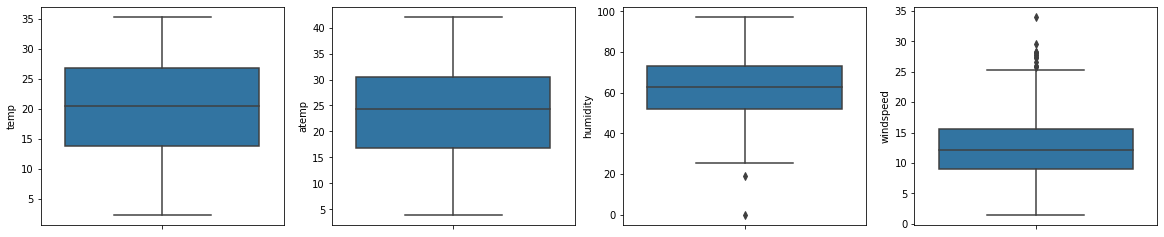

In [20]:
# Draw the boxplot for variables with continuous values
inp = ['temp','atemp','humidity','windspeed']
plt.figure(figsize=[20,4])

i=1
for col in inp:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data = df)
    i+=1

* From the above box plots, we can observe that there are no outliers in the dataset.

### EDA

### Analysing Numeric variables

Text(0.5, 1.0, 'Plot for continuous numeric variables')

<Figure size 720x432 with 0 Axes>

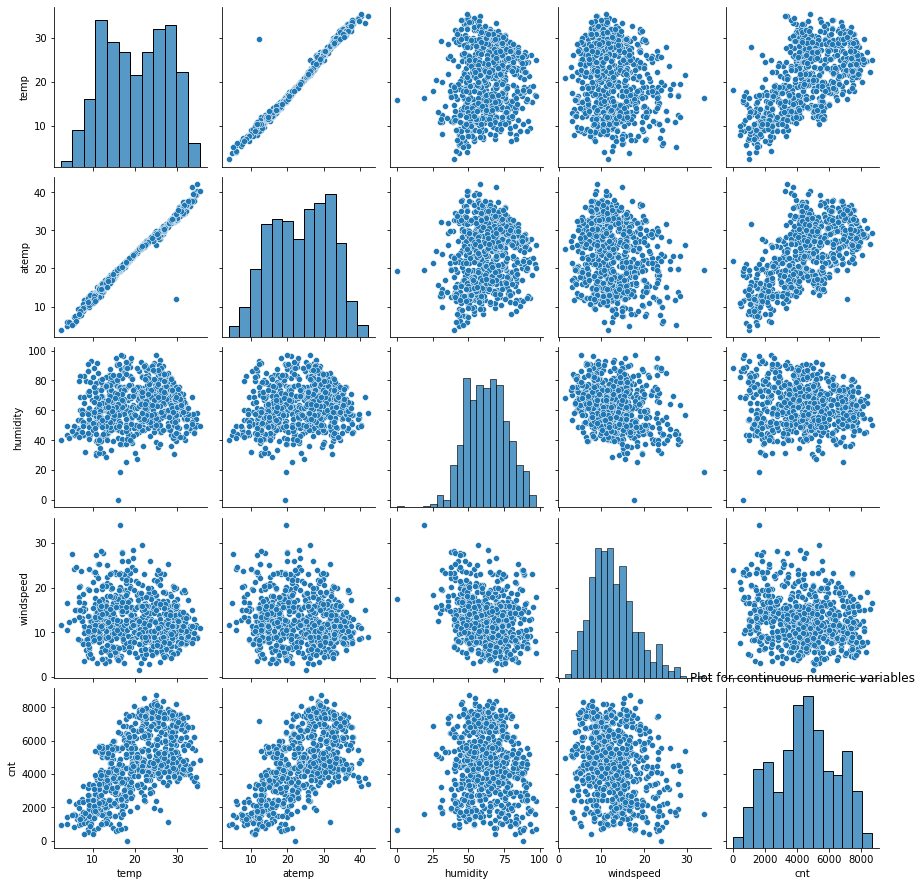

In [21]:
# Pairplots for continuous numeric variables using seaborn

plt.figure(figsize=[10,6])
sns.pairplot(data = df, vars=['temp','atemp','humidity','windspeed','cnt'])
plt.title('Plot for continuous numeric variables')

##### Insights:
* temp and atemp have the highest correlation with the target variable cnt.
* temp and atemp are also highly correlated with each other.

##### Heatmap for correlation between numeric variables

Text(0.5, 1.0, 'Correlation between numeric variables')

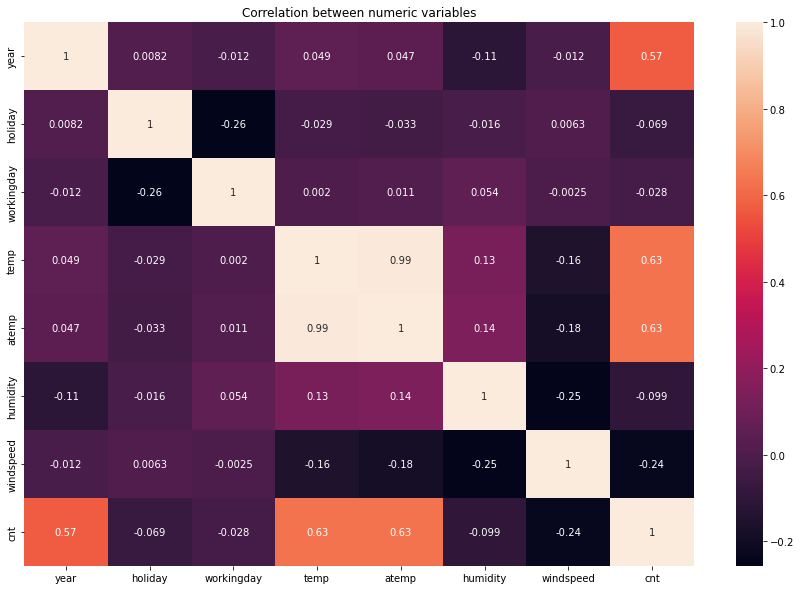

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between numeric variables')

##### Insights:
* From the heatmap, we can observe that temp and atemp have a relation. They have a correlation of 0.99
* We can also see that there is a correlation of 0.63 between cnt-temp and cnt-atemp.
* We cannot use both the variables 'temp' and 'atemp' in the model due to multi-collinearity.
* Based on the VIF and p-value, we can decide which parameters are required for the model.

In [23]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,11.46350,43.6957,12.522300,1600


### Analysing Categorical Variables


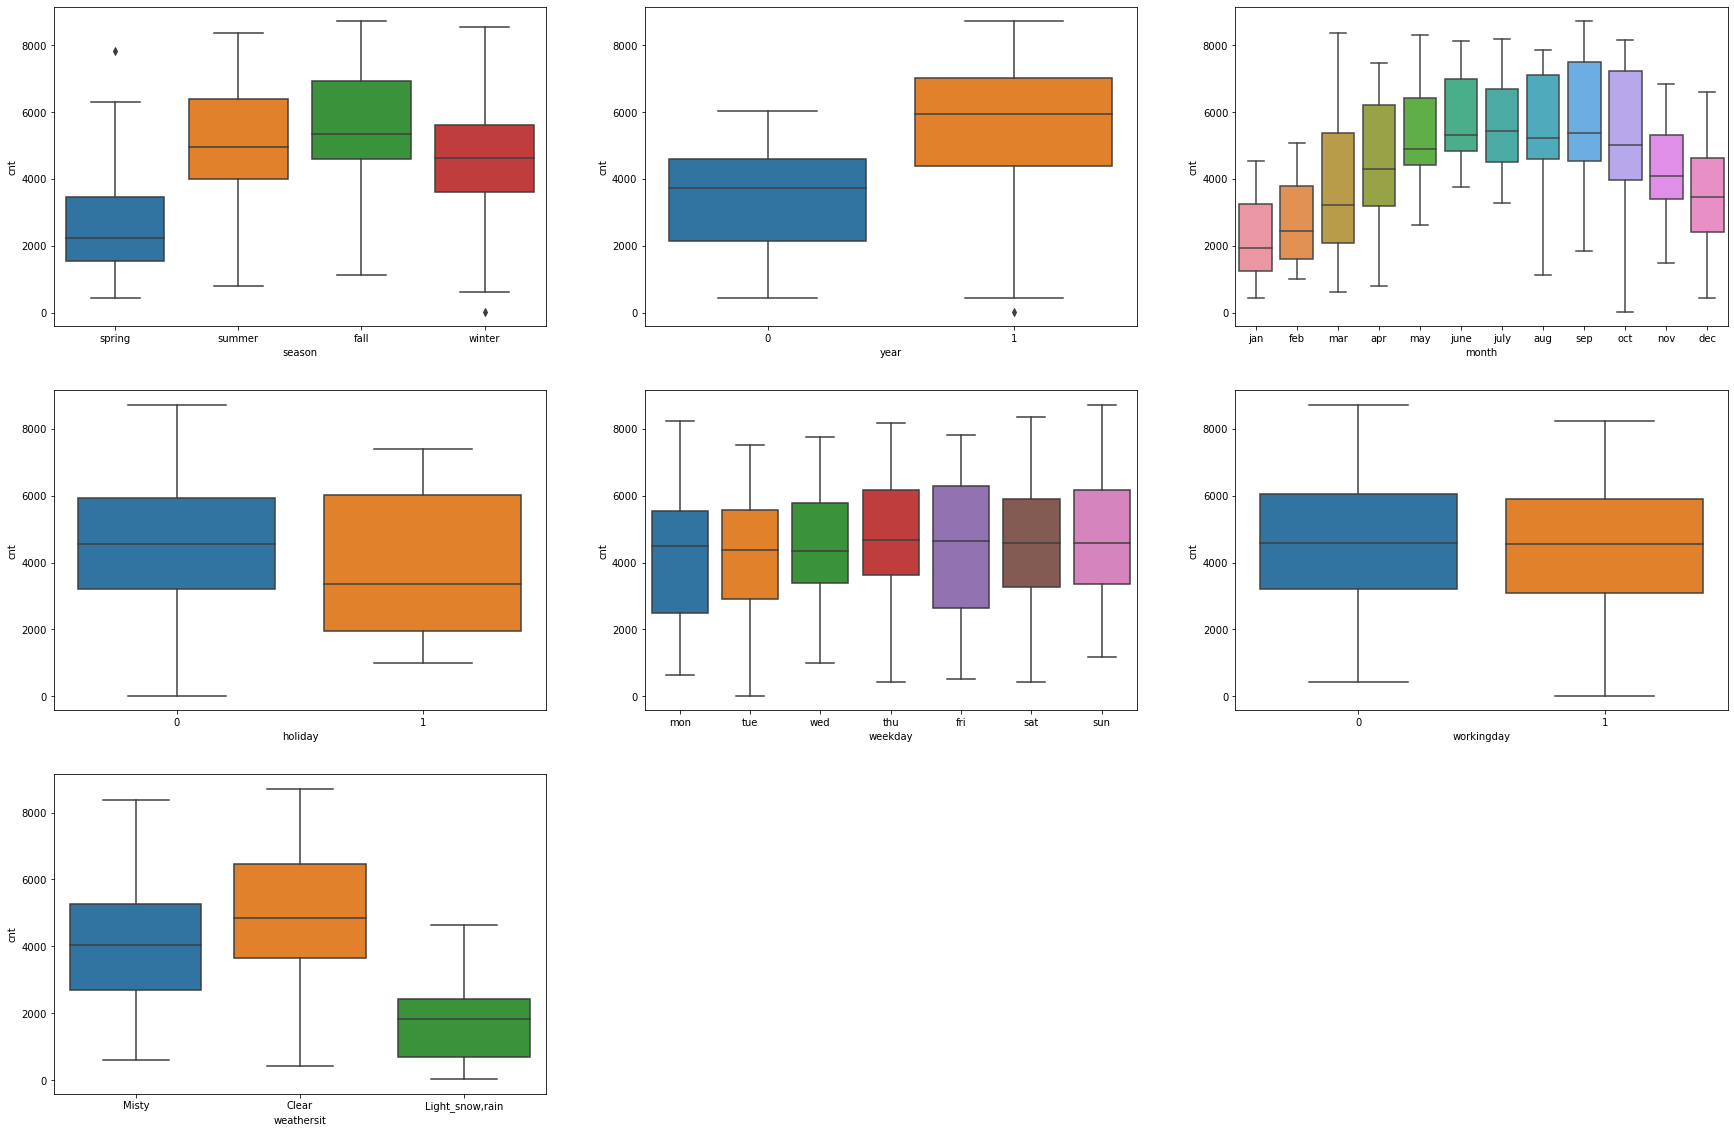

In [24]:
#Boxplots to analyse the categorical variables

inp = ['season','year', 'month','holiday', 'weekday', 'workingday','weathersit']
plt.figure(figsize=[30,20])

i=1
for col in inp:
    plt.subplot(3,3,i)
    sns.boxplot(x=col, y='cnt',data = df)
    i+=1

##### Insights:
* Season - Most of the bike booking happened in fall and summer season with a median of over 5000 bookings. Season can be one of the good predictor for the dependent variable. 
* Year - There were more demand in 2019 compared to 2018.
* Month - September month has the highest demand with around 7000 maximum bookings. The number of ride count increases between May and October. These months are summer and fall season in US. 
* Holiday - Most of the bookings happened when it is not a holiday. Demand has decreased when there is a holiday. 
* Weekdays - Weekday variable can have some or no influence towards predictor since they show similar trend with a median of over 5000 bookings.
* Working Day - Majority of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking. 
* Weather sit - The clear weather has the highest demand followed by misty weather.

### Data Preparation for Linear Regression

#### Creating dummy variables for all categorical variables

In [25]:
df = pd.get_dummies(data=df,columns=["season","month","weekday"],drop_first=True)

In [26]:
df = pd.get_dummies(data=df,columns=["weathersit"])

In [27]:
df.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,"weathersit_Light_snow,rain",weathersit_Misty
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   atemp                       730 non-null    float64
 4   humidity                    730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   season_spring               730 non-null    uint8  
 8   season_summer               730 non-null    uint8  
 9   season_winter               730 non-null    uint8  
 10  month_aug                   730 non-null    uint8  
 11  month_dec                   730 non-null    uint8  
 12  month_feb                   730 non-null    uint8  
 13  month_jan                   730 non

### Model Building 

#### Splitting the data into training and testing data

In [29]:
df.shape

(730, 30)

In [30]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Splitting the dataset into train and test with 70:30 ratio
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=42)

In [32]:
df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,"weathersit_Light_snow,rain",weathersit_Misty
683,1,0,1,16.22460,62.0417,10.250129,5445,0,0,1,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,19.38040,70.9583,12.708493,5478,0,0,1,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,30.08270,49.4583,20.458450,5020,0,1,0,...,0,0,0,0,0,0,1,1,0,0
360,0,0,1,16.38165,76.2500,12.626150,1162,1,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,29.95665,79.3750,4.458569,7572,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [33]:
# Checking shape and size for train and test
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Feature Scaling

In [34]:
# Let us scale continuous variables
inp = ['atemp','humidity','windspeed','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[inp] = scaler.fit_transform(df_train[inp])

In [35]:
df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,"weathersit_Light_snow,rain",weathersit_Misty
683,1,0,1,0.322150,0.639330,0.327101,0.605336,0,0,1,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.404998,0.731215,0.419004,0.609320,0,0,1,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.685963,0.509660,0.708724,0.554026,0,1,0,...,0,0,0,0,0,0,1,1,0,0
360,0,0,1,0.326273,0.785745,0.415925,0.088253,1,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.682653,0.817947,0.110593,0.862127,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [36]:
df_train.describe()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,"weathersit_Light_snow,rain",weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.698039,0.526680,0.653801,0.414566,0.498206,0.231373,0.256863,0.250980,...,0.090196,0.149020,0.143137,0.133333,0.135294,0.156863,0.133333,0.625490,0.029412,0.345098
std,0.500025,0.163554,0.459559,0.213153,0.143542,0.185671,0.233905,0.422124,0.437332,0.434003,...,0.286744,0.356457,0.350557,0.340268,0.342373,0.364028,0.340268,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.698389,0.756762,0.525698,0.677080,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Manual Analysis of variables using correlation coefficient


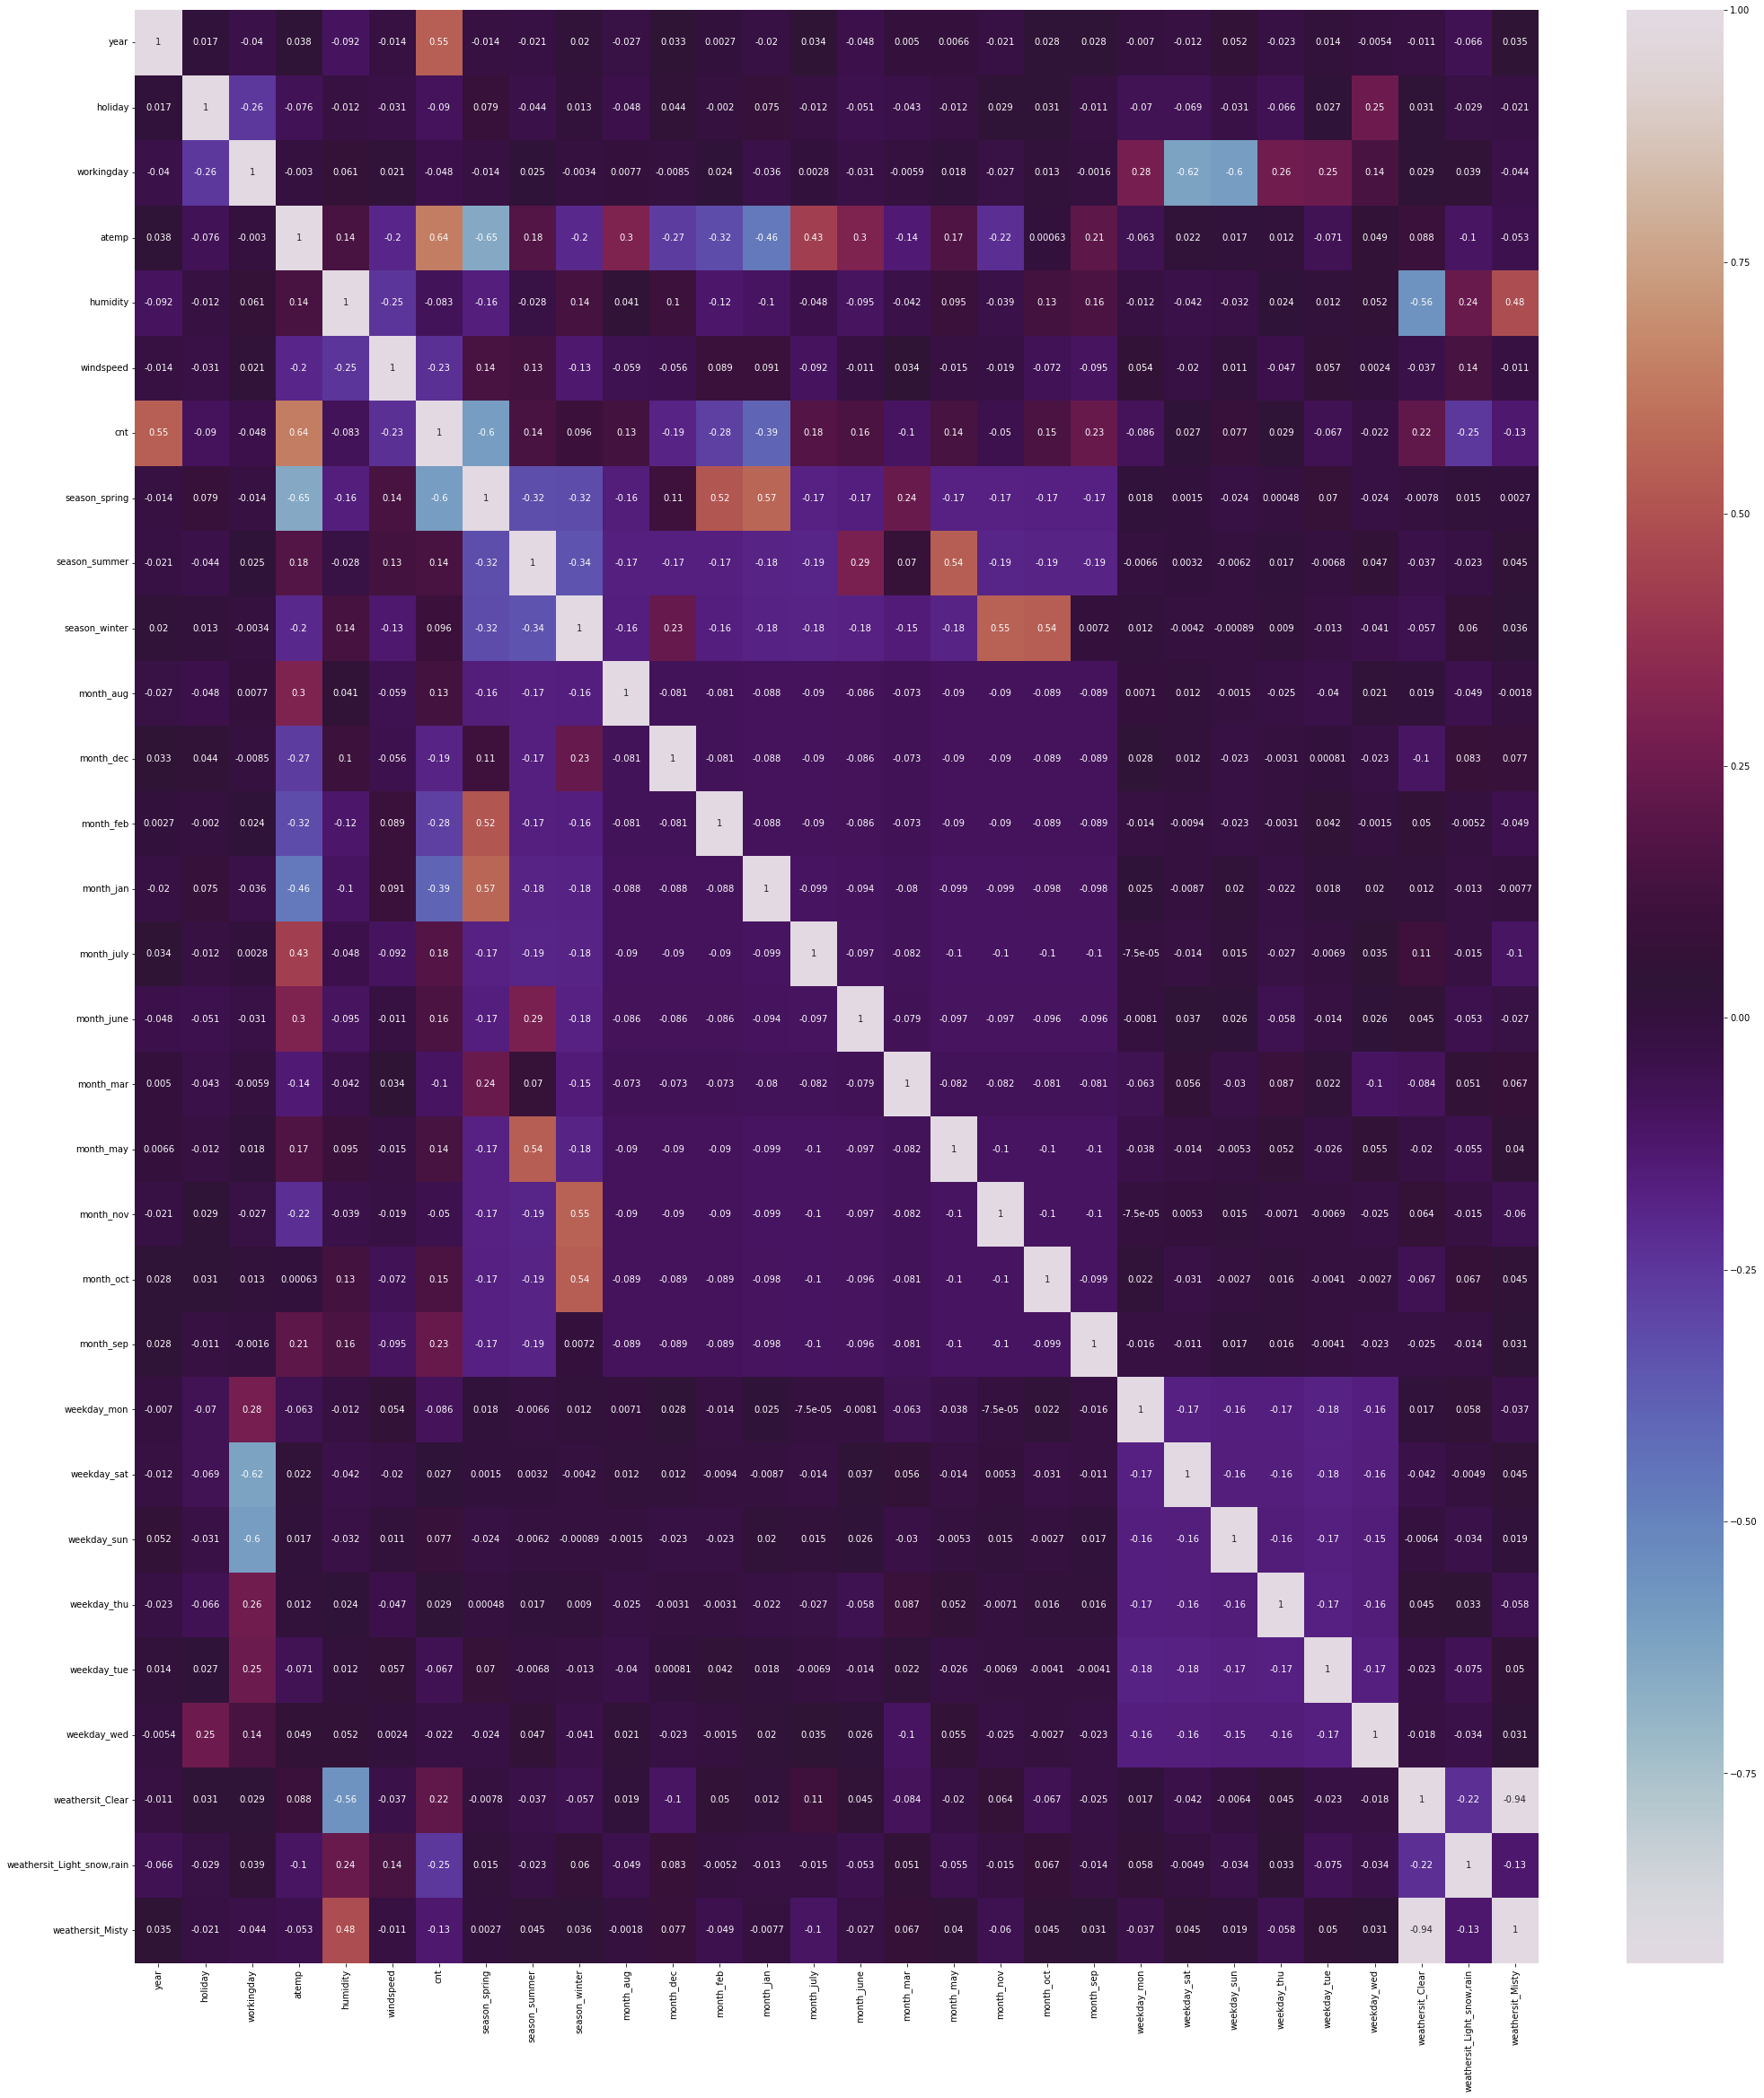

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (35, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="twilight")
plt.show()

##### Defining target and feature variable for model building

In [38]:
# y : contains only target variable
y_train = df_train.pop('cnt')

# x : all variables except cnt
X_train = df_train

In [39]:
print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


In [40]:
X_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,season_spring,season_summer,season_winter,month_aug,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,"weathersit_Light_snow,rain",weathersit_Misty
683,1,0,1,0.322150,0.639330,0.327101,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.404998,0.731215,0.419004,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.685963,0.509660,0.708724,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
360,0,0,1,0.326273,0.785745,0.415925,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.682653,0.817947,0.110593,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


### Build a model using RFE and Automated approach

In [41]:
# Using RFE method for variable selection
# Importing RFE and LinearRegression 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

We have about 29 Predictors to predict the outcome. Analysing all these predictors is a time consuming process. <br>
To simplify this process, we will use RFE (Recursive Feature Elimination) method, which will provide us with set of variables ranked in an order of importance (of impacting outcome) <br>
We will pass an arbitary number (here 15), which means the method will rank first 15 predictors as 1 & remaining as 0.

In [42]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
#Reduce number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('month_aug', False, 14),
 ('month_dec', True, 1),
 ('month_feb', False, 9),
 ('month_jan', False, 13),
 ('month_july', True, 1),
 ('month_june', False, 8),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('month_oct', False, 3),
 ('month_sep', True, 1),
 ('weekday_mon', False, 4),
 ('weekday_sat', False, 11),
 ('weekday_sun', False, 12),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 5),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light_snow,rain', True, 1),
 ('weathersit_Misty', False, 2)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'season_spring',
       'season_winter', 'month_dec', 'month_july', 'month_mar', 'month_may',
       'month_nov', 'month_sep', 'weathersit_Clear',
       'weathersit_Light_snow,rain'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'month_aug', 'month_feb', 'month_jan',
       'month_june', 'month_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_Misty'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### Model 1 - Start with all variables selected by RFE

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_1 = sm.add_constant(X_train_rfe)

# Running the linear model
lr_1 = sm.OLS(y_train,X_train_rfe_1).fit() 

#Let's see the summary of our linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.69e-186
Time:                        19:13:09   Log-Likelihood:                 487.54
No. Observations:                 510   AIC:                            -943.1
Df Residuals:                     494   BIC:                            -875.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [49]:
# Generic function to calculate VIF of variables

def vifcalculate(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [50]:
vifcalculate(X_train_rfe)

,Features,VIF
3,humidity,20.89
2,atemp,20.06
4,windspeed,5.12
13,weathersit_Clear,3.26
5,season_spring,3.21
6,season_winter,2.96
0,year,2.09
11,month_nov,1.86
8,month_july,1.57
7,month_dec,1.38


* Since VIF value is high for humidity column, we can drop it.
* We can keep 'atemp' as temperature could be an important factor for a business like bike rentals. 

#### Model 2

In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe =  X_train_rfe.drop(["humidity"], axis = 1)

In [52]:
# Adding a constant variable   
X_train_rfe_2 = sm.add_constant(X_train_rfe)

# Running the linear model
lr_2 = sm.OLS(y_train,X_train_rfe_2).fit() 

#Let's see the summary of our linear model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.46e-183
Time:                        19:13:09   Log-Likelihood:                 477.81
No. Observations:                 510   AIC:                            -925.6
Df Residuals:                     495   BIC:                            -862.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [53]:
vifcalculate(X_train_rfe)

,Features,VIF
2,atemp,6.64
3,windspeed,4.95
12,weathersit_Clear,2.84
5,season_winter,2.45
0,year,2.09
4,season_spring,1.96
10,month_nov,1.82
7,month_july,1.53
6,month_dec,1.32
9,month_may,1.31


* Since VIF value is high for atemp column, we can drop it.

#### Model 3

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe =  X_train_rfe.drop(["atemp"], axis = 1)

In [55]:
# Adding a constant variable   
X_train_rfe_3 = sm.add_constant(X_train_rfe)

# Running the linear model
lr_3 = sm.OLS(y_train,X_train_rfe_3).fit() 

#Let's see the summary of our linear model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     142.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.93e-158
Time:                        19:13:09   Log-Likelihood:                 414.86
No. Observations:                 510   AIC:                            -801.7
Df Residuals:                     496   BIC:                            -742.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
vifcalculate(X_train_rfe)

,Features,VIF
2,windspeed,3.39
11,weathersit_Clear,2.41
4,season_winter,2.40
0,year,1.96
3,season_spring,1.78
9,month_nov,1.77
5,month_dec,1.32
6,month_july,1.24
8,month_may,1.21
10,month_sep,1.17


* We can drop windspeed column since VIF value is high.

#### Model 4

In [57]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe =  X_train_rfe.drop(["windspeed"], axis = 1)

In [58]:
# Adding a constant variable   
X_train_rfe_4 = sm.add_constant(X_train_rfe)

# Running the linear model
lr_4 = sm.OLS(y_train,X_train_rfe_4).fit() 

#Let's see the summary of our linear model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     145.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.25e-154
Time:                        19:13:09   Log-Likelihood:                 402.13
No. Observations:                 510   AIC:                            -778.3
Df Residuals:                     497   BIC:                            -723.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [59]:
vifcalculate(X_train_rfe)

,Features,VIF
3,season_winter,2.32
10,weathersit_Clear,2.01
0,year,1.79
8,month_nov,1.77
2,season_spring,1.56
4,month_dec,1.32
5,month_july,1.22
6,month_mar,1.15
7,month_may,1.15
9,month_sep,1.14


* We can drop season_winter column since VIF value is high.

#### Model 5

In [60]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe =  X_train_rfe.drop(['season_winter'], axis = 1)

In [61]:
# Adding a constant variable   
X_train_rfe_5 = sm.add_constant(X_train_rfe)

# Running the linear model
lr_5 = sm.OLS(y_train,X_train_rfe_5).fit() 

#Let's see the summary of our linear model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     156.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.29e-153
Time:                        19:13:09   Log-Likelihood:                 398.57
No. Observations:                 510   AIC:                            -773.1
Df Residuals:                     498   BIC:                            -722.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [62]:
vifcalculate(X_train_rfe)

,Features,VIF
9,weathersit_Clear,1.93
0,year,1.71
2,season_spring,1.46
4,month_july,1.20
7,month_nov,1.16
5,month_mar,1.15
6,month_may,1.13
8,month_sep,1.13
3,month_dec,1.12
1,holiday,1.04


* We can drop month_may column since p value is high.

#### Model 6

In [63]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe =  X_train_rfe.drop(['month_may'], axis = 1)

In [64]:
# Adding a constant variable   
X_train_rfe_6 = sm.add_constant(X_train_rfe)

# Running the linear model
lr_6 = sm.OLS(y_train,X_train_rfe_6).fit() 

#Let's see the summary of our linear model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     171.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.56e-154
Time:                        19:13:09   Log-Likelihood:                 398.07
No. Observations:                 510   AIC:                            -774.1
Df Residuals:                     499   BIC:                            -727.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [65]:
vifcalculate(X_train_rfe)

,Features,VIF
8,weathersit_Clear,1.84
0,year,1.65
2,season_spring,1.43
4,month_july,1.18
5,month_mar,1.15
6,month_nov,1.15
7,month_sep,1.12
3,month_dec,1.11
1,holiday,1.04
9,"weathersit_Light_snow,rain",1.04


* We can drop month_july column since p value is high.

#### Model 7

In [66]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe =  X_train_rfe.drop(['month_july'], axis = 1)

In [67]:
# Adding a constant variable   
X_train_rfe_7 = sm.add_constant(X_train_rfe)

# Running the linear model
lr_7 = sm.OLS(y_train,X_train_rfe_7).fit() 

#Let's see the summary of our linear model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     190.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.45e-155
Time:                        19:13:09   Log-Likelihood:                 397.24
No. Observations:                 510   AIC:                            -774.5
Df Residuals:                     500   BIC:                            -732.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [68]:
vifcalculate(X_train_rfe)

,Features,VIF
7,weathersit_Clear,1.70
0,year,1.62
2,season_spring,1.39
4,month_mar,1.15
5,month_nov,1.12
3,month_dec,1.11
6,month_sep,1.10
1,holiday,1.04
8,"weathersit_Light_snow,rain",1.04


* Since atemp column is highly related to bike booking, lets add atemp and check.

#### Model 8

In [69]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe['atemp']= X_train['atemp']

In [70]:
# Adding a constant variable   
X_train_rfe_8 = sm.add_constant(X_train_rfe)

# Running the linear model
lr_8 = sm.OLS(y_train,X_train_rfe_8).fit() 

#Let's see the summary of our linear model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     217.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.06e-174
Time:                        19:13:09   Log-Likelihood:                 445.73
No. Observations:                 510   AIC:                            -869.5
Df Residuals:                     499   BIC:                            -822.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [71]:
vifcalculate(X_train_rfe)

,Features,VIF
9,atemp,3.40
7,weathersit_Clear,2.81
0,year,2.04
2,season_spring,1.46
6,month_sep,1.17
4,month_mar,1.16
5,month_nov,1.13
3,month_dec,1.11
8,"weathersit_Light_snow,rain",1.07
1,holiday,1.04


* Since p value of month_nov is high, we can drop month_nov column.

#### Model 9

In [72]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe =  X_train_rfe.drop(['month_nov'], axis = 1)

In [73]:
# Adding a constant variable   
X_train_rfe_9 = sm.add_constant(X_train_rfe)

# Running the linear model
lr_9 = sm.OLS(y_train,X_train_rfe_9).fit() 

#Let's see the summary of our linear model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     240.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.70e-175
Time:                        19:13:09   Log-Likelihood:                 444.29
No. Observations:                 510   AIC:                            -868.6
Df Residuals:                     500   BIC:                            -826.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [74]:
vifcalculate(X_train_rfe)

,Features,VIF
8,atemp,3.39
6,weathersit_Clear,2.67
0,year,2.02
2,season_spring,1.43
4,month_mar,1.16
5,month_sep,1.16
3,month_dec,1.11
7,"weathersit_Light_snow,rain",1.06
1,holiday,1.04


* Since p value of month_dec is high, we can drop month_dec column.

#### Model 10

In [75]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe =  X_train_rfe.drop(['month_dec'], axis = 1)

In [76]:
# Adding a constant variable   
X_train_rfe_10 = sm.add_constant(X_train_rfe)

# Running the linear model
lr_10 = sm.OLS(y_train,X_train_rfe_10).fit() 

#Let's see the summary of our linear model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     269.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.23e-176
Time:                        19:13:10   Log-Likelihood:                 443.29
No. Observations:                 510   AIC:                            -868.6
Df Residuals:                     501   BIC:                            -830.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [77]:
vifcalculate(X_train_rfe)

,Features,VIF
7,atemp,3.39
5,weathersit_Clear,2.67
0,year,1.99
2,season_spring,1.39
4,month_sep,1.16
3,month_mar,1.15
6,"weathersit_Light_snow,rain",1.05
1,holiday,1.04


* Model 10 looks pretty decent with p-values significant and very low multicollinearity between the predictor variables.
* The R-squared and Adj. R-squared looks very good at 0.811 and 0.808 respectively.
* F-static is also large, stating a good fit of model.
* Difference between R-squared and Adjusted R-squared values for this model is very less, which means that there are no additional parameters that can be removed from this model.
* We will check the test data metrics to check whether this model is significant enough or not.

##  Proof for Linear Regrssion Assumptions

### Residual Analysis of the train data

Error terms are normally distributed with mean zero.

In [78]:
y_train_pred = lr_10.predict(X_train_rfe_10)

Text(0.5, 0, 'Errors')

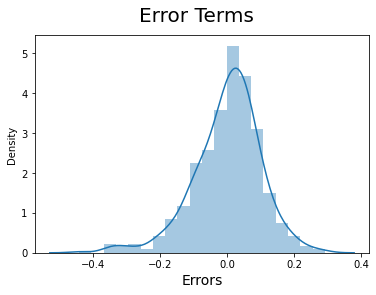

In [79]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 14)

From the above graph we can observe that Error Distribution is normallly distributed across zero, which indicates that our model has handled the assumption of Error Normal Distribution properly.

### Homoscedasticity

Text(0, 0.5, 'Residual')

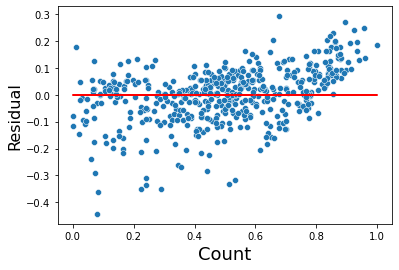

In [80]:
# Plotting y_train and y_pred to understand the spread

fig = plt.figure()
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train-y_train), '-r')
plt.xlabel('Count', fontsize = 18)                          # X-label
plt.ylabel('Residual', fontsize = 16)

No visible pattern observed from above plot for residuals.

### Multi collinearity

In [81]:
vifcalculate(X_train_rfe)

,Features,VIF
7,atemp,3.39
5,weathersit_Clear,2.67
0,year,1.99
2,season_spring,1.39
4,month_sep,1.16
3,month_mar,1.15
6,"weathersit_Light_snow,rain",1.05
1,holiday,1.04


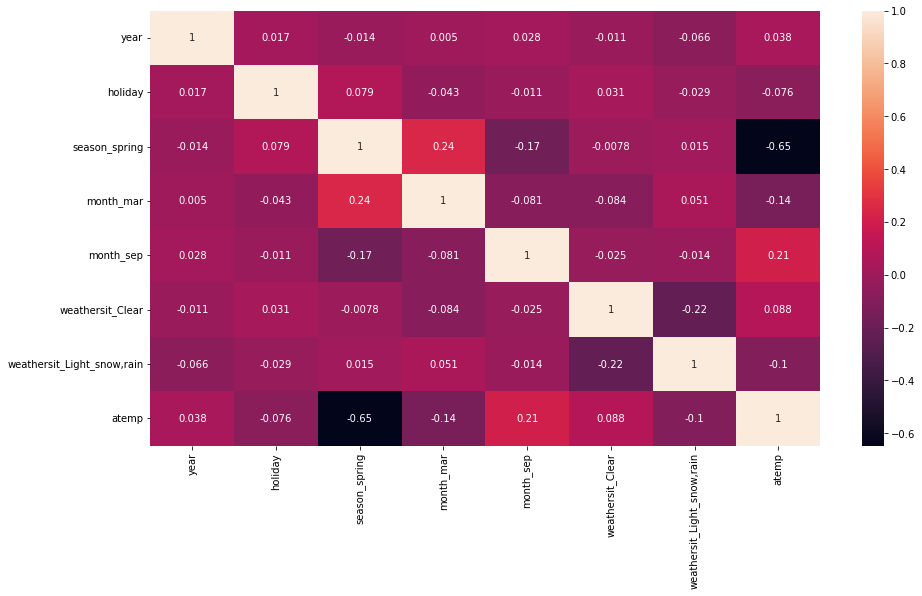

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True)
plt.show()

* From the heatmap, we can observe that there is no multi collinearity and VIF values are also less than 5.

### Linear Relationship

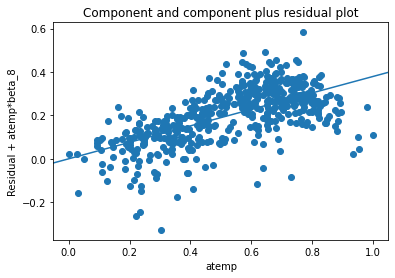

In [83]:
sm.graphics.plot_ccpr(lr_10, 'atemp')
plt.show()

* The above graph represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved.

## Making Predictions Using the Final Model:

#### Applying the scaling on the test sets

In [84]:
num_vars = ['atemp', 'humidity', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,"weathersit_Light_snow,rain",weathersit_Misty
468,1,0,0,0.536771,0.518248,0.422104,0.848606,0,1,0,...,0,0,0,1,0,0,0,1,0,0
148,0,0,1,0.704203,0.843709,0.479765,0.526017,0,1,0,...,0,0,0,0,0,1,0,1,0,0
302,0,0,1,0.317998,0.642765,0.386287,0.350115,0,0,1,...,0,0,0,0,0,1,0,1,0,0
355,0,0,0,0.455552,0.780592,0.062325,0.318363,1,0,0,...,0,0,1,0,0,0,0,0,0,1
515,1,0,1,0.724915,0.507943,0.433030,0.833877,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [85]:
df_test.describe()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,"weathersit_Light_snow,rain",weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.671233,0.501760,0.629546,0.435511,0.479553,0.283105,0.237443,0.228311,...,0.063927,0.132420,0.141553,0.164384,0.159817,0.114155,0.164384,0.657534,0.027397,0.315068
std,0.498836,0.176306,0.470841,0.215759,0.152584,0.212750,0.233091,0.451539,0.426491,0.420705,...,0.245183,0.339723,0.349389,0.371472,0.367276,0.318728,0.371472,0.475622,0.163612,0.465607
min,0.000000,0.000000,0.000000,0.051010,0.193646,0.060760,-0.049378,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.314694,0.520479,0.281156,0.285826,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.496145,0.608416,0.416900,0.471206,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.685028,0.735901,0.534288,0.644151,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.939531,1.002146,1.214955,0.980804,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [86]:
y_test = df_test.pop('cnt')
X_test = df_test

In [87]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [88]:
# Making predictions
y_pred = lr_10.predict(X_test_new)

In [89]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8028

## Model Evaluation

Let's now plot the graph for actual values versus predicted values.

Text(0, 0.5, 'y_pred')

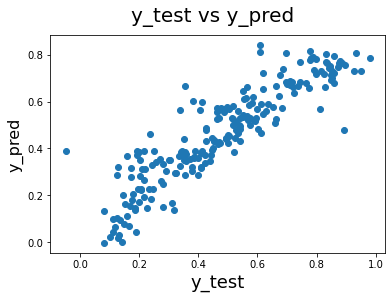

In [90]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##### Plot Test vs Predicted test values

In [91]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_test_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

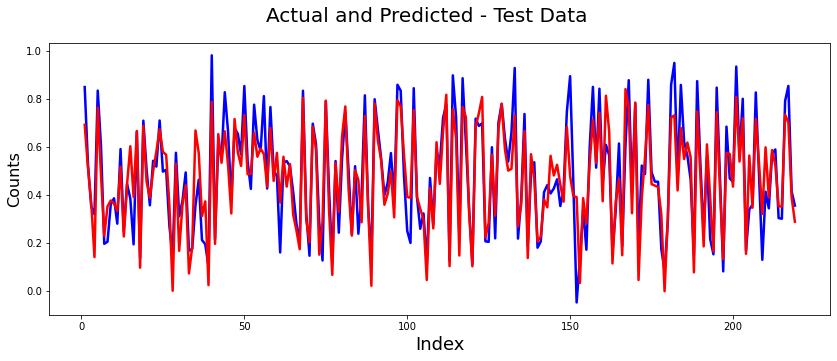

In [93]:
#Plot Actual vs Predicted for Test Data
plot_test_pred(y_test,y_pred,len(y_test)+1,'Test Data')

As we can see predictions for test data is very close to actuals.

##### Plot Error Terms for test data

In [94]:
# Error terms
def plot_err(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

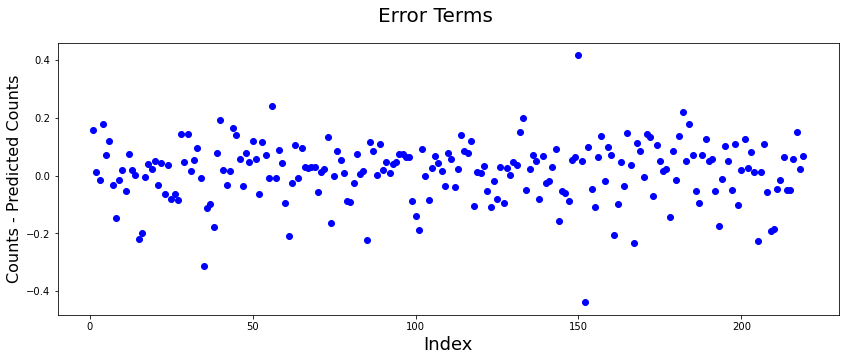

In [95]:
#Plot error terms for test data
plot_err(y_test,y_pred)

As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

In [97]:
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     269.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.23e-176
Time:                        19:21:20   Log-Likelihood:                 443.29
No. Observations:                 510   AIC:                            -868.6
Df Residuals:                     501   BIC:                            -830.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1656      0.019      8.710      0.000       0.128       0.203
year                           0.2424      0.009     26.624      0.000       0.225       0.260
holiday                       -0.0714      0.028     -2.558      0.011      -0.126      -0.017
season_spring                 -0.1988      0.014    -13.730      0.000      -0.227      -0.170
month_mar                      0.0564      0.019      2.908      0.004       0.018       0.095
month_sep                      0.0745      0.016      4.591      0.000       0.043       0.106
weathersit_Clear               0.0795      0.010      8.206      0.000       0.060       0.099
weathersit_Light_snow,rain    -0.1981      0.028     -7.133      0.000      -0.253      -0.144
atemp                          0.3796      0.029     13.305      0.000       0.324       0.436
==============================================================================
Omnibus:                       59.246   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.731
Skew:                          -0.719   Prob(JB):                     2.99e-23
Kurtosis:                       4.677   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see the demand for bikes depends mainly on below variables:
* Atemp
* Year
* Season
* Holiday

##### Demands increases in the month of mar, sept and year.
##### Demand decreases if it is holiday , Spring, weathersit_Light_snow,rain. 